In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from random import randrange
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [3]:
#importing the dataset

data = pd.read_csv("data.csv")
print(data.head())

   MWG  NWG  KWG  MDIMC  NDIMC  MDIMA  NDIMB  KWI  VWM  VWN  STRM  STRN  SA  \
0   16   16   16      8      8      8      8    2    1    1     0     0   0   
1   16   16   16      8      8      8      8    2    1    1     0     0   0   
2   16   16   16      8      8      8      8    2    1    1     0     0   1   
3   16   16   16      8      8      8      8    2    1    1     0     0   1   
4   16   16   16      8      8      8      8    2    1    1     0     1   0   

   SB  Run1 (ms)  Run2 (ms)  Run3 (ms)  Run4 (ms)  
0   0     115.26     115.87     118.55     115.80  
1   1      78.13      78.25      79.25      79.19  
2   0      79.84      80.69      80.76      80.97  
3   1      84.32      89.90      86.75      85.58  
4   0     115.13     121.98     122.73     114.81  


In [4]:
data["Avg_Run"] = data.iloc[:,14:].mean(axis = 1)
data.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),Avg_Run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81,118.6625


In [5]:
median_class = data['Avg_Run'].median()
data.loc[data['Avg_Run'] >= median_class, 'Run_Class'] = 1
data.loc[data['Avg_Run'] < median_class, 'Run_Class'] = 0

In [6]:
data.drop(['Run1 (ms)', 'Run2 (ms)','Run3 (ms)', 'Run4 (ms)', 'Avg_Run'], axis = 1, inplace = True)
data.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run_Class
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,1.0
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,1.0
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,1.0
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,1.0
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,1.0


In [7]:
# defining feature matrix(X) and response vector(y) 
X = data.iloc[:, 0:14]
y = data["Run_Class"]


# splitting X and y into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, 
                                                    random_state=10) 

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [8]:
X_train.shape

(120800, 14)

In [8]:
## Accuracy Plots
def accuracy_plot(param, acc_train, acc_test, title, xlab, ylab):
    plt.plot(param,acc_train,marker='o',markersize=6,color='blue',label='train')
    plt.plot(param,acc_test,marker='o',markersize=6,color='red',label='test')
    plt.title(title)
    plt.xlabel(xlab)
    plt.grid()
    plt.ylabel(ylab)
    plt.legend()
    plt.show()

In [46]:
#SVM for different Kernals
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
diff_kernels_acc_train = []
diff_kernels_acc_test = []
for i in range(len(kernels)):
    print("---- SVM kernel :", kernels[i], "----")
    poly_svm = SVC(kernel= kernels[i] ,gamma='auto', random_state=5)
    poly_svm.fit(X_train , y_train)
    y_pred_train = poly_svm.predict(X_train)
    y_pred_test = poly_svm.predict(X_test)
    diff_kernels_acc_train.append(accuracy_score(y_train,y_pred_train))
    diff_kernels_acc_test.append(accuracy_score(y_test,y_pred_test))

---- SVM kernel : linear ----
---- SVM kernel : poly ----
---- SVM kernel : rbf ----
---- SVM kernel : sigmoid ----


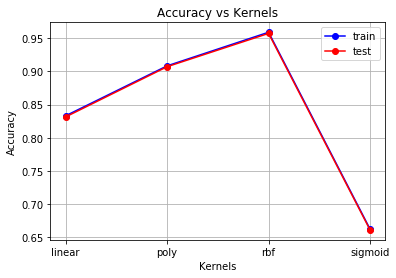

In [48]:
accuracy_plot(kernels,diff_kernels_acc_train, diff_kernels_acc_test,
             "Accuracy vs Kernels", 'Kernels', 'Accuracy')

In [50]:
#SVM for polynomial kernel with different degrees
poly_degree = np.arange(5,11,1)
poly_degree_acc_train = []
poly_degree_acc_test = []
poly_degree_run_time = []
for i in poly_degree:
    print("---- polynomial kernel with degree :", i, "----")
    poly_svm = SVC(kernel='poly', degree= i, gamma='auto',random_state=5)
    poly_svm.fit(X_train , y_train)
    y_pred_train = poly_svm.predict(X_train)
    y_pred_test = poly_svm.predict(X_test)
    poly_degree_acc_train.append(accuracy_score(y_train,y_pred_train))
    poly_degree_acc_test.append(accuracy_score(y_test,y_pred_test))

---- polynomial kernel with degree : 5 ----
---- polynomial kernel with degree : 6 ----
---- polynomial kernel with degree : 7 ----
---- polynomial kernel with degree : 8 ----
---- polynomial kernel with degree : 9 ----
---- polynomial kernel with degree : 10 ----


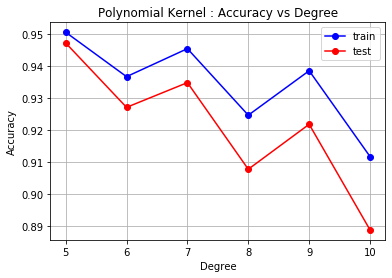

In [51]:
accuracy_plot(poly_degree,poly_degree_acc_train, poly_degree_acc_test,
             "Polynomial Kernel : Accuracy vs Degree", 'Degree', 'Accuracy')

In [ ]:
#K-fold Cross Validation for Kernel SVM

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
mean_accuracy = []
for i in range(len(kernels)):
    print("---Cross Validation for :",kernels[i])
    score = cross_val_score(estimator = SVC(kernel = kernels[i], gamma = 'auto', random_state = 5), 
                               X = X_train, y = y_train, cv = 10)
    mean_accuracy.append(score.mean())

In [ ]:
#plotting mean accuracies for cross-validation 
plt.plot(kernels , mean_accuracy , marker ='o', markersize = 8 , color ='red',label='k-fold mean')
plt.title(" Accuracy Vs kernels ")
plt.xlabel("Kernels")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [9]:
#Cross Validation for different folds

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
folds = list(range(3,15,3))
mean_accuracy_kernel_folds = []
mean_accuracy_folds = []


for i in range(len(kernels)):
    print("---- Cross validation for kernel : ", kernels[i])
    for j in range(len(folds)):
        print("Cross validation for folds : ", folds[j])
        score = cross_val_score(estimator = SVC(kernel = kernels[i], gamma = 'auto', random_state = 5), 
                                   X = X_train, y = y_train, cv = folds[j])
        
        mean_accuracy_folds.append(score.mean())
    
    mean_accuracy_kernel_folds.append(mean_accuracy_folds)
    mean_accuracy_folds = []


---- Cross validation for kernel :  linear
Cross validation for folds :  3
Cross validation for folds :  6
Cross validation for folds :  9
Cross validation for folds :  12
---- Cross validation for kernel :  poly
Cross validation for folds :  3
Cross validation for folds :  6
Cross validation for folds :  9
Cross validation for folds :  12
---- Cross validation for kernel :  rbf
Cross validation for folds :  3
Cross validation for folds :  6
Cross validation for folds :  9
Cross validation for folds :  12
---- Cross validation for kernel :  sigmoid
Cross validation for folds :  3
Cross validation for folds :  6
Cross validation for folds :  9
Cross validation for folds :  12


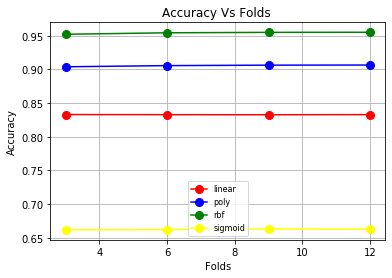

In [10]:
# Plotting the mean accuracies found from cross validtion and test set accuracy

colors = ['red', 'blue', 'green', 'yellow']
for i in range(len(kernels)):
    plt.plot(folds , mean_accuracy_kernel_folds[i] , marker ='o', markersize = 8 , color =colors[i],label=kernels[i])

plt.title("Accuracy Vs Folds ")
plt.xlabel("Folds")
plt.grid()
plt.ylabel("Accuracy")
plt.legend(prop={'size': 8})
plt.show()